In [1]:
from elasticsearch import Elasticsearch
from elasticsearch_dsl import Search
from elasticsearch_dsl import Q
import pandas as pd

client = Elasticsearch()
s = Search(using=client, index="logs_extractor") \
    .query(Q("match", log_level='WARN') | Q("match", log_level='ERROR')) \
    .source(include=["timestamp", "message", "source", "log_level"])
response = s.execute()
print(s.count())

5996


In [3]:
hits = []
for hit in s.scan():
    hits.append([hit.message, hit.source, hit.timestamp, hit.log_level])
data = pd.DataFrame(hits, columns=['message', 'source', 'timestamp', "log_level"])
data.head(5)

,message,source,timestamp,log_level
0,The saving of history tracking returned an exc...,/home/seti/Documents/ClusteringLogs/Logs/Impor...,2018-05-14 02:16:39.0966,WARN
1,Error occurred while building parsed candidate...,/home/seti/Documents/ClusteringLogs/Logs/Impor...,2018-05-12 01:04:24.8138,ERROR
2,Unhandled exception wile running process (Form...,/home/seti/Documents/ClusteringLogs/Logs/Forma...,2018-05-12 01:02:57.1995,ERROR
3,Error occurred while building parsed candidate...,/home/seti/Documents/ClusteringLogs/Logs/Impor...,2018-05-12 01:03:02.0592,ERROR
4,Error occurred while building parsed candidate...,/home/seti/Documents/ClusteringLogs/Logs/Impor...,2018-05-12 01:04:25.4232,ERROR


In [4]:
data['source'].replace(regex=True,inplace=True,to_replace=r'/home/seti/Documents/ClusteringLogs/Logs/',value=r'')
data['source'].replace(regex=True,inplace=True,to_replace=r'/.+\.log',value=r'')
data.head(5)

,message,source,timestamp,log_level
0,The saving of history tracking returned an exc...,Importing,2018-05-14 02:16:39.0966,WARN
1,Error occurred while building parsed candidate...,Importing,2018-05-12 01:04:24.8138,ERROR
2,Unhandled exception wile running process (Form...,Formatting,2018-05-12 01:02:57.1995,ERROR
3,Error occurred while building parsed candidate...,Importing,2018-05-12 01:03:02.0592,ERROR
4,Error occurred while building parsed candidate...,Importing,2018-05-12 01:04:25.4232,ERROR


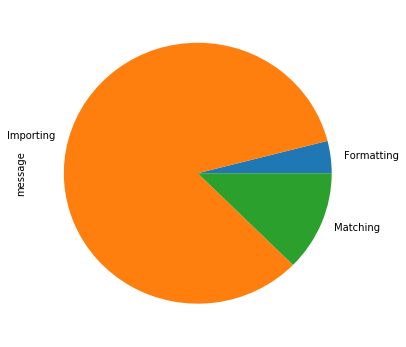

In [6]:
data.groupby('source').count()['message'].plot.pie(figsize=(6, 6))

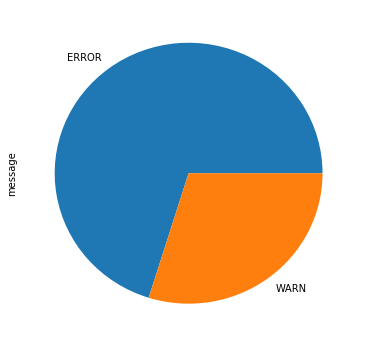

In [7]:
data.groupby('log_level').count()['message'].plot.pie(figsize=(6,6))